In [30]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import hashlib

In [31]:
# Define the directory containing your images
images_directory = "../My_Image/"

In [32]:
def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Resize the image
    img = cv2.resize(img, (64, 64))

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply a slight blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Histogram equalization
    equalized = cv2.equalizeHist(blurred)

    # Normalize pixel values
    normalized = equalized / 255.0

    return normalized

In [33]:
from hashlib import md5
def get_hash(image):
    image = preprocess_image(image)
    with open(image, 'rb') as file: # open the file for reading in binary mode
        return hashlib.sha256(file.read()).hexdigest()

In [34]:
duplicates = []
hash_keys = dict()
for index, filename in enumerate(os.listdir(images_directory)):
    if os.path.isfile(os.path.join(images_directory,filename)):
        with open(os.path.join(images_directory,filename), 'rb') as file:
            filehash = hashlib.sha256(file.read()).hexdigest()
        if filehash not in hash_keys:
            hash_keys[filehash] = index
        else:
            duplicates.append((index,hash_keys[filehash]))

In [35]:
duplicates

[(3, 1), (4, 0)]

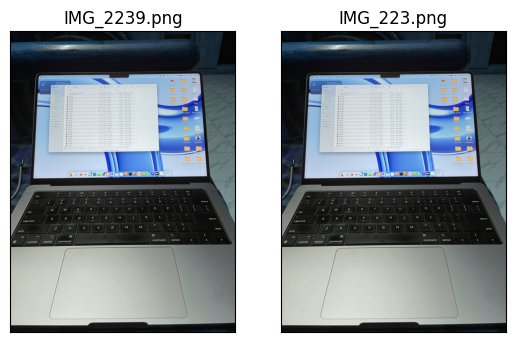

In [36]:
for file_indexes in duplicates[:1]:
    try:
        plt.subplot(121),plt.imshow(cv2.imread(os.path.join(images_directory,os.listdir(images_directory)[file_indexes[1]])))
        plt.title(os.listdir(images_directory)[file_indexes[1]]), plt.xticks([]), plt.yticks([])
        plt.subplot(122),plt.imshow(cv2.imread(os.path.join(images_directory,os.listdir(images_directory)[file_indexes[0]])))
        plt.title(os.listdir(images_directory)[file_indexes[0]]), plt.xticks([]), plt.yticks([])
        plt.show()
    except OSError as e:
        continue